<a href="https://colab.research.google.com/github/DinWaikabu/Machine_Learning/blob/master/Comparing_Classifier_Models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Comparing Classifier for Building Clasification Models

Source from : [ https://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html]

### **Import Library**

In [1]:
from sklearn.datasets import  make_classification

###**Generate dataset**

In [2]:
X, y = make_classification(n_samples=800, n_classes=2 ,n_features=6, n_redundant=0, random_state=0)

#### Dimensi dataset

In [3]:
X.shape, y.shape

((800, 6), (800,))

In [4]:
print("features : ", X)
print("Label: ", y)

features :  [[-1.08424537  1.07371211  0.63658677  1.43144325 -0.06656285  0.03232998]
 [-0.68105767 -0.03820798 -0.98045925  0.15706946 -0.56776724 -0.59115967]
 [ 2.2301304   1.44799625 -0.3315769  -1.84147189 -0.69330889 -0.26051296]
 ...
 [-1.14515662  1.33076839  1.51900328  0.10665229  0.78374449  1.90134005]
 [ 0.1422362   0.02586352 -0.26149032  0.07626311  0.85473127  1.1878939 ]
 [ 1.9313977   2.23401114 -0.28683521  0.53703455  1.63440564  0.57122663]]
Label:  [1 1 1 1 1 0 0 0 1 1 1 1 0 1 1 1 1 0 0 1 0 0 1 1 1 1 0 1 1 0 1 1 0 0 1 1 0
 1 1 0 1 0 1 0 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 1 0 1 1 0 0 0 0 1 1 0 1 1 0
 1 1 1 0 0 0 0 0 0 1 0 0 0 1 0 1 0 1 0 0 0 0 1 0 0 1 0 0 0 0 0 1 0 1 0 0 0
 0 0 1 0 0 0 0 1 1 0 0 1 1 0 1 0 0 0 1 0 1 0 0 1 0 0 0 0 1 1 0 1 0 1 0 1 1
 0 0 1 0 0 1 0 0 0 0 1 1 1 1 1 0 1 1 0 1 0 1 0 1 1 0 0 1 0 1 1 1 1 1 0 0 0
 1 0 0 1 1 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 1 0 0 0 1 1 1 0 0 0 0 1 0 0 0 1 0
 1 0 1 0 0 1 0 0 0 0 0 0 0 1 1 0 1 1 1 1 0 0 0 0 1 0 1 1 0 0 1 0 1 1 1 0 0

### **Import Library**

In [5]:
from sklearn.model_selection import train_test_split

### **Data Split**

train : 70% , test= 30%

In [6]:
X_train, X_test,y_train, y_test = train_test_split(X, y, test_size=0.3)

In [7]:
X_train.shape , y_train.shape

((560, 6), (560,))

### **Build Models**

### **Import Library**

In [8]:
import pandas as pd

from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.svm import SVC 
from sklearn.gaussian_process import GaussianProcessClassifier 
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier, AdaBoostClassifier
from sklearn.gaussian_process.kernels import RBF 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.naive_bayes import GaussianNB 
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import ExtraTreesClassifier

### **Define Learning Classifiers**

In [9]:
names = ["Nearest_Neighbors", "Linear_SVM", "Polynomial_SVM", "RBF_SVM", "Gaussian_Process",
         "Gradient_Boosting", "Decision_Tree", "Extra_Trees", "Random_Forest", "Neural_Net", "AdaBoost",
         "Naive_Bayes", "QDA", "SGD"]

classifiers = [
      KNeighborsClassifier(3),
      SVC(kernel='rbf', C=1, gamma=2),
      SVC(kernel='linear',C=0.025),
      SVC(kernel='poly', degree=3, C=0.025),
      GaussianProcessClassifier(1.0 * RBF(1.0)),
      GradientBoostingClassifier(n_estimators=100, learning_rate=1.0),
      DecisionTreeClassifier(max_depth=5),
      ExtraTreesClassifier(n_estimators=10, min_samples_split=2),
      RandomForestClassifier(max_depth=5, n_estimators=100),
      MLPClassifier(alpha=1, max_iter=1000),
      AdaBoostClassifier(n_estimators=100),
      GaussianNB(),
      QuadraticDiscriminantAnalysis(),
      SGDClassifier(loss='hinge', penalty='l2')]


### **Build Model, and apply model on test data**

In [10]:
scores = []

for name, Clf in zip(names, classifiers):
  Clf.fit(X_train, y_train)
  score= Clf.score(X_test, y_test)
  scores.append(score)

In [11]:
scores

[0.8875,
 0.9,
 0.9166666666666666,
 0.7875,
 0.9333333333333333,
 0.9125,
 0.925,
 0.9291666666666667,
 0.9416666666666667,
 0.9375,
 0.9,
 0.9083333333333333,
 0.9083333333333333,
 0.875]

### **Analysis Models**

#### **Import Library**

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt 

In [14]:
df = pd.DataFrame()

In [16]:
df['name'] = names
df['score'] = scores 

In [17]:
df

,name,score
0,Nearest_Neighbors,0.887500
1,Linear_SVM,0.900000
2,Polynomial_SVM,0.916667
3,RBF_SVM,0.787500
4,Gaussian_Process,0.933333
5,Gradient_Boosting,0.912500
6,Decision_Tree,0.925000
7,Extra_Trees,0.929167
8,Random_Forest,0.941667
9,Neural_Net,0.937500


### **plot models**

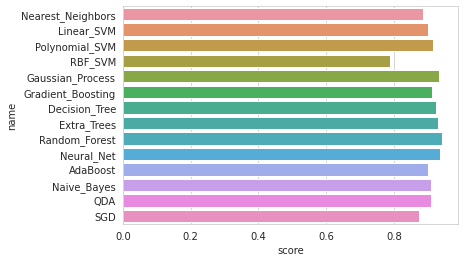

In [22]:
sns.set_style('whitegrid')
sns.barplot(y='name', x='score', data=df)